In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv("C:\\Users\\rokha\\Downloads\\urban_\\futuristic_city_traffic.csv")

In [4]:
data.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [5]:
data['City'].unique

<bound method Series.unique of 0          SolarisVille
1              AquaCity
2             Neuroburg
3             Ecoopolis
4              AquaCity
               ...     
1219562    SolarisVille
1219563     MetropolisX
1219564       Neuroburg
1219565     MetropolisX
1219566       Ecoopolis
Name: City, Length: 1219567, dtype: object>

In [6]:
data = pd.get_dummies(data=data, columns=['Vehicle Type','Weather','Economic Condition'])

In [7]:
data.head()

,City,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Vehicle Type_Autonomous Vehicle,Vehicle Type_Car,Vehicle Type_Drone,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable
0,SolarisVille,Sunday,20,29.4268,0,0,14.7134,0.5241,False,False,True,False,False,False,False,True,False,False,False,True
1,AquaCity,Wednesday,2,118.8000,0,0,143.5682,0.3208,False,False,False,True,False,False,False,False,True,False,True,False
2,Neuroburg,Wednesday,16,100.3904,0,0,91.2640,0.0415,True,False,False,False,False,False,False,False,True,False,True,False
3,Ecoopolis,Thursday,8,76.8000,1,0,46.0753,0.1811,False,False,True,False,True,False,False,False,False,True,False,False
4,AquaCity,Saturday,16,45.2176,0,0,40.1934,0.4544,True,False,False,False,False,False,False,False,True,False,False,True


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
data['City'] = label_encoder.fit_transform(data['City'])
data['Day Of Week'] = label_encoder.fit_transform(data['Day Of Week'])

In [10]:
data

,City,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Vehicle Type_Autonomous Vehicle,Vehicle Type_Car,Vehicle Type_Drone,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable
0,4,3,20,29.4268,0,0,14.7134,0.5241,False,False,True,False,False,False,False,True,False,False,False,True
1,0,6,2,118.8000,0,0,143.5682,0.3208,False,False,False,True,False,False,False,False,True,False,True,False
2,3,6,16,100.3904,0,0,91.2640,0.0415,True,False,False,False,False,False,False,False,True,False,True,False
3,1,4,8,76.8000,1,0,46.0753,0.1811,False,False,True,False,True,False,False,False,False,True,False,False
4,0,2,16,45.2176,0,0,40.1934,0.4544,True,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219562,4,6,13,75.7534,0,0,60.6027,0.3840,True,False,False,False,False,True,False,False,False,True,False,False
1219563,2,2,1,24.7660,0,0,14.8122,0.5526,False,False,True,False,False,False,False,True,False,True,False,False
1219564,3,1,19,75.6292,0,0,61.8568,0.0564,True,False,False,False,False,False,False,True,False,True,False,False
1219565,2,1,1,52.7983,0,0,85.7116,0.5079,True,False,False,False,True,False,False,False,False,True,False,False


In [11]:
data.dtypes

City                                 int32
Day Of Week                          int32
Hour Of Day                          int64
Speed                              float64
Is Peak Hour                         int64
Random Event Occurred                int64
Energy Consumption                 float64
Traffic Density                    float64
Vehicle Type_Autonomous Vehicle       bool
Vehicle Type_Car                      bool
Vehicle Type_Drone                    bool
Vehicle Type_Flying Car               bool
Weather_Clear                         bool
Weather_Electromagnetic Storm         bool
Weather_Rainy                         bool
Weather_Snowy                         bool
Weather_Solar Flare                   bool
Economic Condition_Booming            bool
Economic Condition_Recession          bool
Economic Condition_Stable             bool
dtype: object

In [12]:
data['Vehicle Type_Autonomous Vehicle']=data['Vehicle Type_Autonomous Vehicle'].astype(int)
data['Vehicle Type_Car']=data['Vehicle Type_Car'].astype(int)
data['Vehicle Type_Drone']=data['Vehicle Type_Drone'].astype(int)
data['Vehicle Type_Flying Car']=data['Vehicle Type_Flying Car'].astype(int)
data['Weather_Clear']=data['Weather_Clear'].astype(int)
data['Weather_Electromagnetic Storm']=data['Weather_Electromagnetic Storm'].astype(int)
data['Weather_Rainy']=data['Weather_Rainy'].astype(int)
data['Weather_Solar Flare']=data['Weather_Solar Flare'].astype(int)
data['Economic Condition_Stable']=data['Economic Condition_Stable'].astype(int)
data['Weather_Snowy']=data['Weather_Snowy'].astype(int)
data['Economic Condition_Booming']=data['Economic Condition_Booming'].astype(int)
data['Economic Condition_Recession']=data['Economic Condition_Recession'].astype(int)


In [13]:
data

,City,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Vehicle Type_Autonomous Vehicle,Vehicle Type_Car,Vehicle Type_Drone,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable
0,4,3,20,29.4268,0,0,14.7134,0.5241,0,0,1,0,0,0,0,1,0,0,0,1
1,0,6,2,118.8000,0,0,143.5682,0.3208,0,0,0,1,0,0,0,0,1,0,1,0
2,3,6,16,100.3904,0,0,91.2640,0.0415,1,0,0,0,0,0,0,0,1,0,1,0
3,1,4,8,76.8000,1,0,46.0753,0.1811,0,0,1,0,1,0,0,0,0,1,0,0
4,0,2,16,45.2176,0,0,40.1934,0.4544,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219562,4,6,13,75.7534,0,0,60.6027,0.3840,1,0,0,0,0,1,0,0,0,1,0,0
1219563,2,2,1,24.7660,0,0,14.8122,0.5526,0,0,1,0,0,0,0,1,0,1,0,0
1219564,3,1,19,75.6292,0,0,61.8568,0.0564,1,0,0,0,0,0,0,1,0,1,0,0
1219565,2,1,1,52.7983,0,0,85.7116,0.5079,1,0,0,0,1,0,0,0,0,1,0,0


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

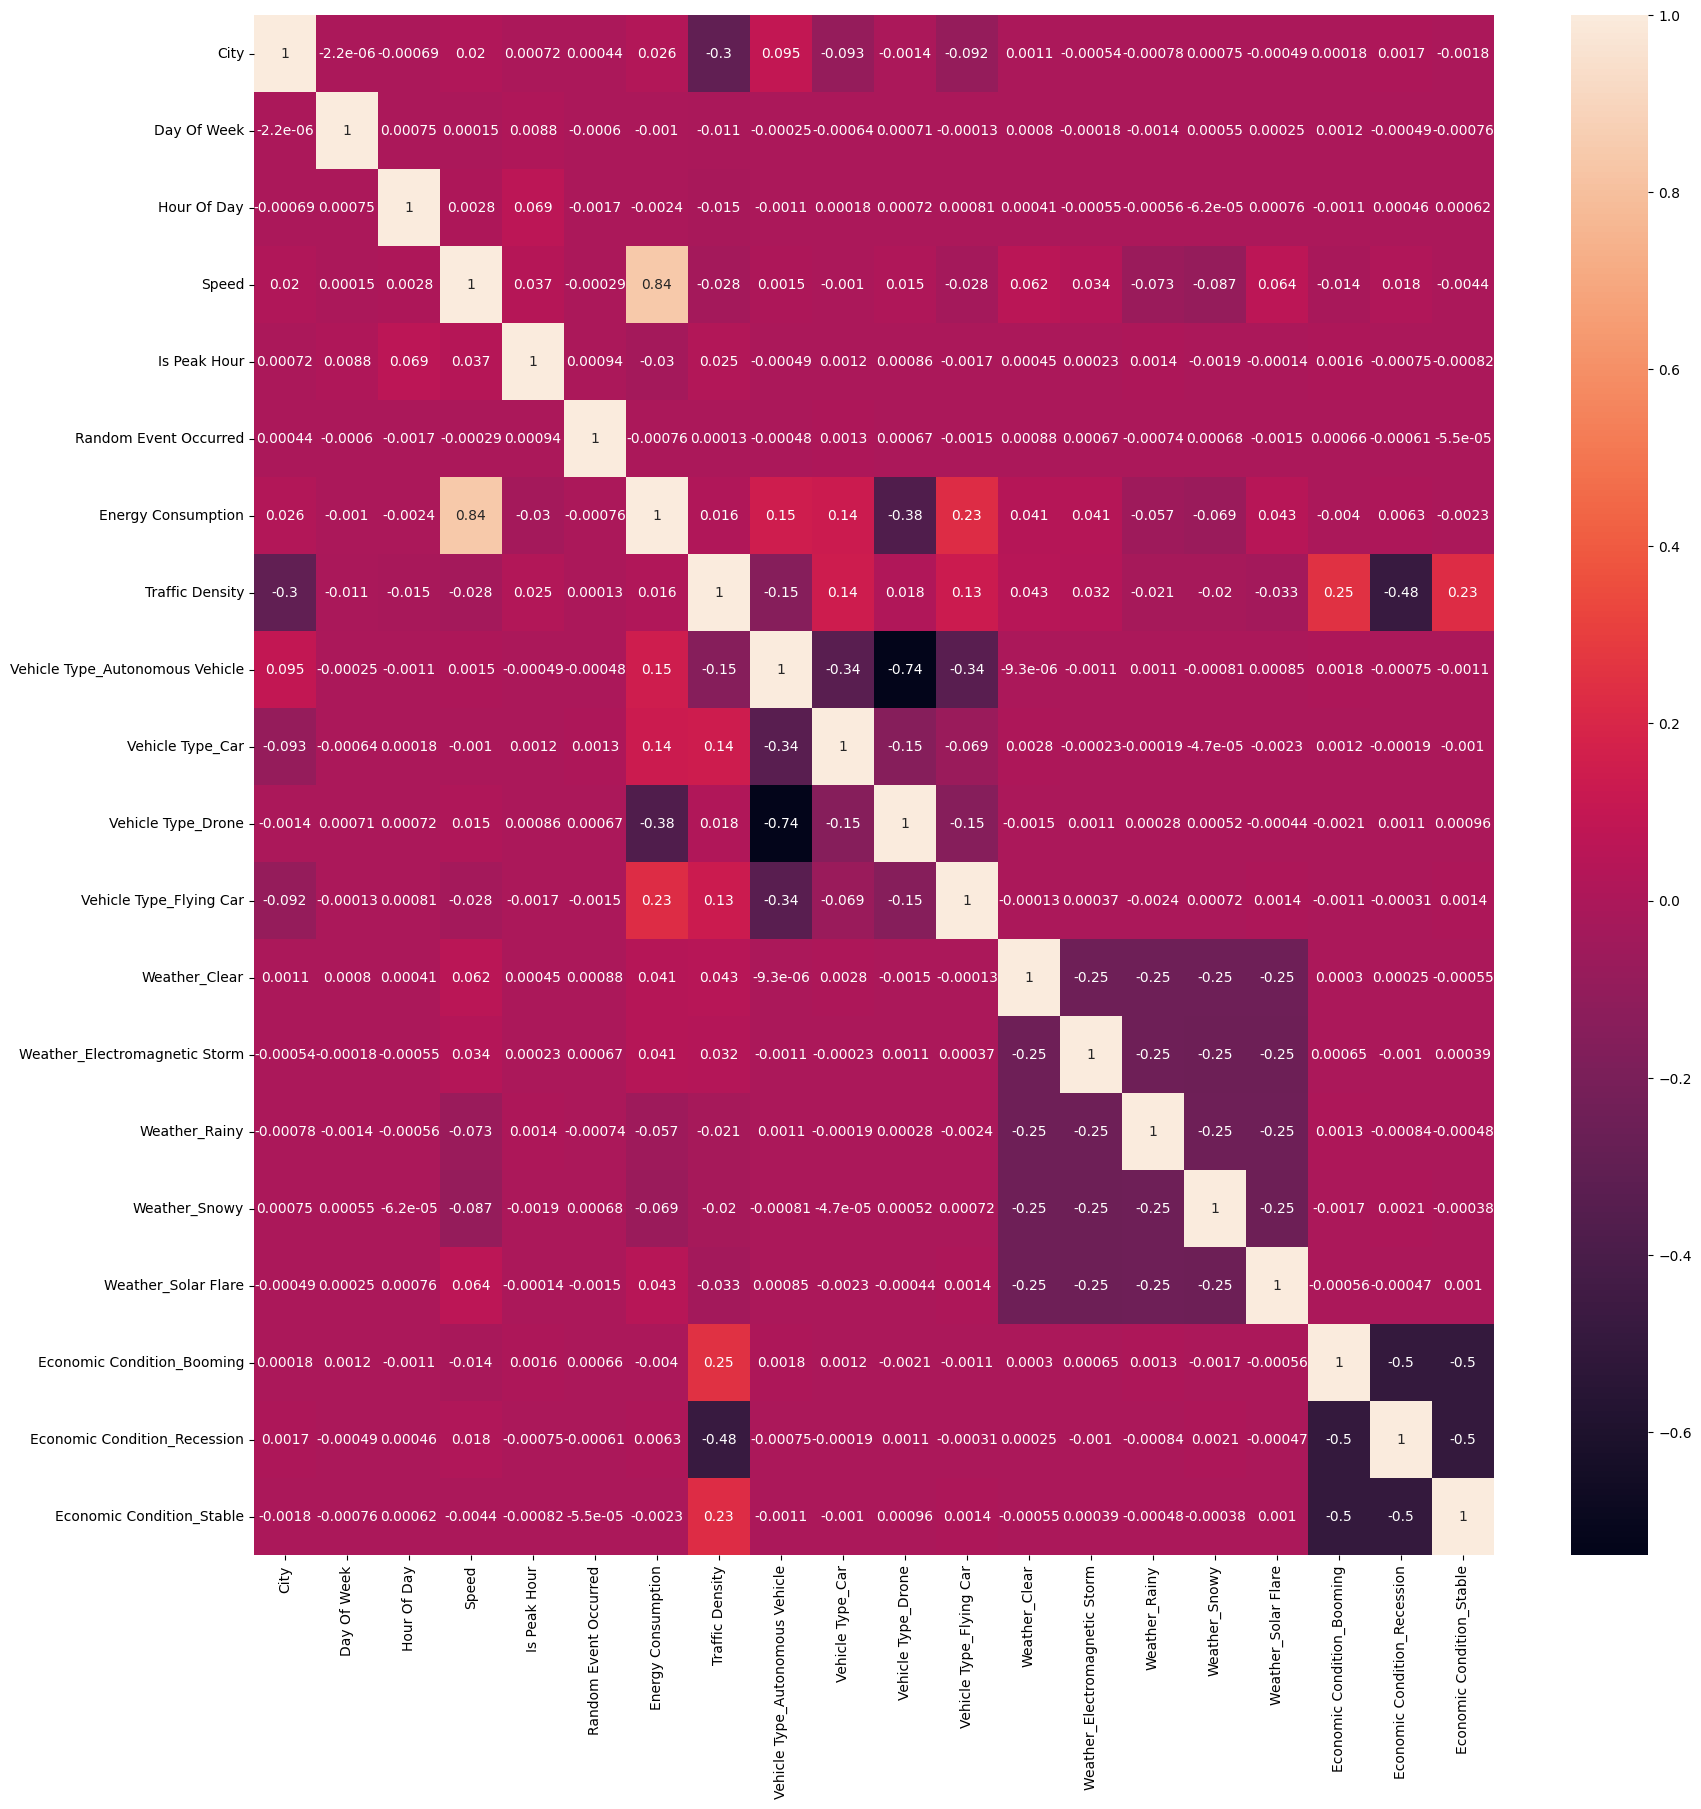

In [15]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True)

In [16]:
data.head(5)

,City,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Vehicle Type_Autonomous Vehicle,Vehicle Type_Car,Vehicle Type_Drone,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable
0,4,3,20,29.4268,0,0,14.7134,0.5241,0,0,1,0,0,0,0,1,0,0,0,1
1,0,6,2,118.8000,0,0,143.5682,0.3208,0,0,0,1,0,0,0,0,1,0,1,0
2,3,6,16,100.3904,0,0,91.2640,0.0415,1,0,0,0,0,0,0,0,1,0,1,0
3,1,4,8,76.8000,1,0,46.0753,0.1811,0,0,1,0,1,0,0,0,0,1,0,0
4,0,2,16,45.2176,0,0,40.1934,0.4544,1,0,0,0,0,0,0,0,1,0,0,1


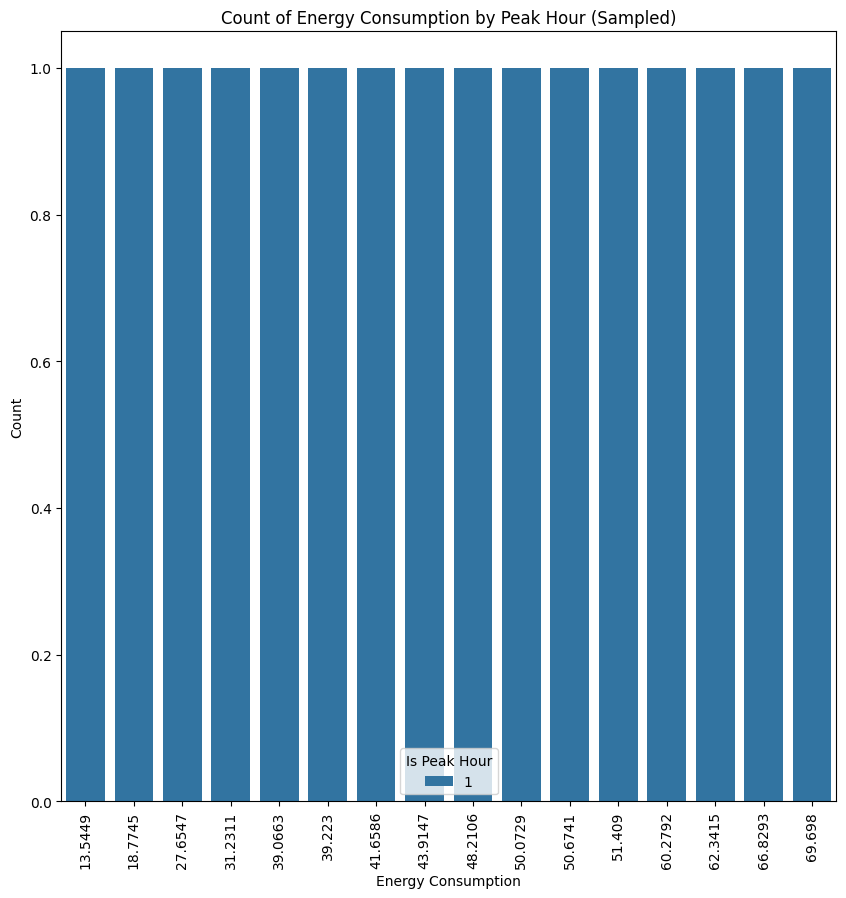

In [30]:

sampled_data = data.sample(n=100, random_state=42)

# Filter the sampled data to include only rows where 'Is Peak Hour' is 1
sampled_data_peak_hour = sampled_data[sampled_data['Is Peak Hour'] == 1]

plt.figure(figsize=(10, 10))
sns.countplot(data=sampled_data_peak_hour, x='Energy Consumption', hue='Is Peak Hour')
plt.title('Count of Energy Consumption by Peak Hour (Sampled)')
plt.xlabel('Energy Consumption')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

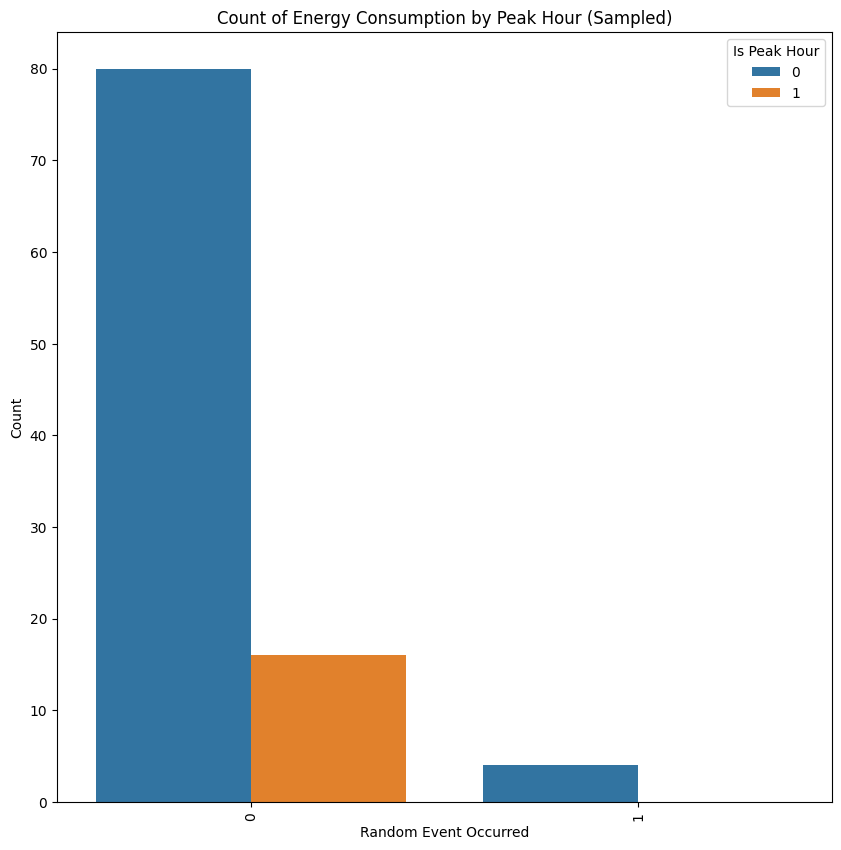

In [34]:

sampled_data = data.sample(n=100, random_state=42)

# Filter the sampled data to include only rows where 'Is Peak Hour' is 1
# sampled_data_peak_hour = sampled_data[sampled_data['Is Peak Hour']]

plt.figure(figsize=(10, 10))
sns.countplot(data=sampled_data, x='Random Event Occurred', hue='Is Peak Hour')
plt.title('Count of Energy Consumption by Peak Hour (Sampled)')
plt.xlabel('Random Event Occurred')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

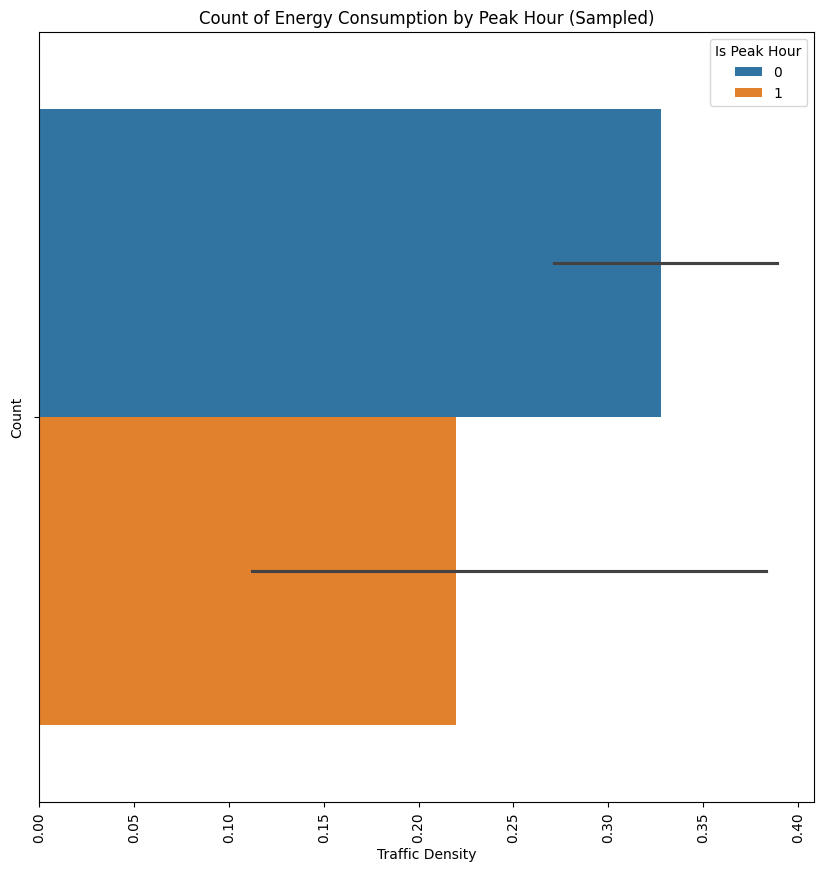

In [36]:
sampled_data = data.sample(n=100, random_state=42)

# Filter the sampled data to include only rows where 'Is Peak Hour' is 1
# sampled_data_peak_hour = sampled_data[sampled_data['Is Peak Hour']]

plt.figure(figsize=(10, 10))
sns.barplot(data=sampled_data, x='Traffic Density', hue='Is Peak Hour')
plt.title('Count of Energy Consumption by Peak Hour (Sampled)')
plt.xlabel('Traffic Density')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression


In [40]:
X = data.drop(['Is Peak Hour'], axis=1)
y = data[['Is Peak Hour']]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

,City,Day Of Week,Hour Of Day,Speed,Random Event Occurred,Energy Consumption,Traffic Density,Vehicle Type_Autonomous Vehicle,Vehicle Type_Car,Vehicle Type_Drone,Vehicle Type_Flying Car,Weather_Clear,Weather_Electromagnetic Storm,Weather_Rainy,Weather_Snowy,Weather_Solar Flare,Economic Condition_Booming,Economic Condition_Recession,Economic Condition_Stable
74643,3,1,22,17.4016,1,10.4077,0.0222,0,0,1,0,0,1,0,0,0,0,1,0
481905,4,3,1,64.2957,0,32.1478,0.3231,0,0,1,0,0,0,1,0,0,0,0,1
284463,3,1,10,80.3686,0,48.0674,0.0654,0,0,1,0,0,1,0,0,0,0,0,1
265670,0,3,20,90.7828,0,72.6263,0.4851,1,0,0,0,0,0,1,0,0,1,0,0
1113151,4,1,12,44.7465,0,35.7972,0.3804,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,3,6,12,74.9347,0,113.5375,0.1015,0,0,0,1,1,0,0,0,0,0,0,1
259178,0,0,22,53.2300,0,26.6150,0.6636,0,0,1,0,1,0,0,0,0,1,0,0
131932,5,3,17,97.9292,0,89.0266,0.1643,1,0,0,0,0,0,0,0,1,1,0,0
671155,5,0,19,89.5671,0,53.5688,0.3755,0,0,1,0,0,0,1,0,0,0,0,1


In [43]:
y_train

,Is Peak Hour
74643,0
481905,0
284463,0
265670,0
1113151,0
...,...
110268,0
259178,0
131932,0
671155,0


In [44]:
y_test

,Is Peak Hour
847212,0
760122,1
678988,0
544510,0
203363,0
...,...
624667,1
1110429,0
41351,0
13719,0


In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
logistic = LogisticRegression()
Sc = StandardScaler()

In [49]:
X_train_sc=Sc.fit_transform(X_train)
X_test_sc = Sc.fit(X_test)

In [50]:
model = logistic.fit(X_train, y_train)


c:\Users\rokha\Downloads\urban_\uran\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rokha\Downloads\urban_\uran\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
predicted_y = model.predict(X_test)

In [54]:
r2_score(predicted_y,y_test)

-29.718739301520866

In [55]:
mean_absolute_error(predicted_y,y_test)

0.15275465942914307

In [56]:
mean_squared_error(predicted_y,y_test)

0.15275465942914307

In [59]:
from sklearn.model_selection import cross_val_score



In [61]:
scores = cross_val_score(model, X_test, y_test, cv=5)

c:\Users\rokha\Downloads\urban_\uran\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rokha\Downloads\urban_\uran\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rokha\Downloads\urban_\uran\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [62]:
print(scores)

[0.84707788 0.84693438 0.84713937 0.84705738 0.84705424]


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

# Generate some example data
# X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
# Define your ElasticNet estimator
estimator = ElasticNet()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# Fit the GridSearchCV object
grid_search.fit(X, y)

# Access the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}


In [67]:
# Access the best score
best_score = grid_search.best_score_
print("Best score:", best_score)


Best score: 0.9998220079068159
